In [1]:
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from tqdm.notebook import tqdm

# Zadanie 
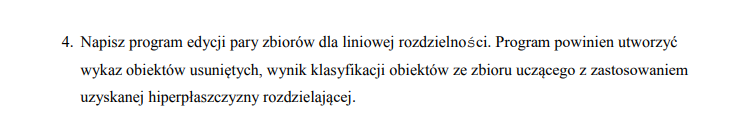

# Teoria 
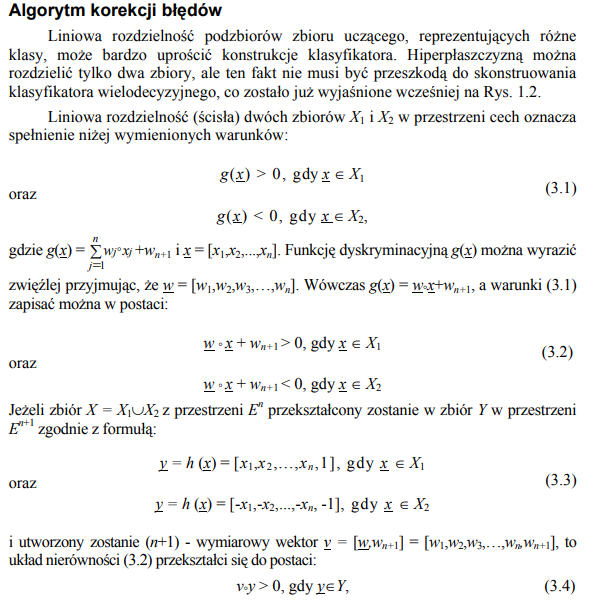

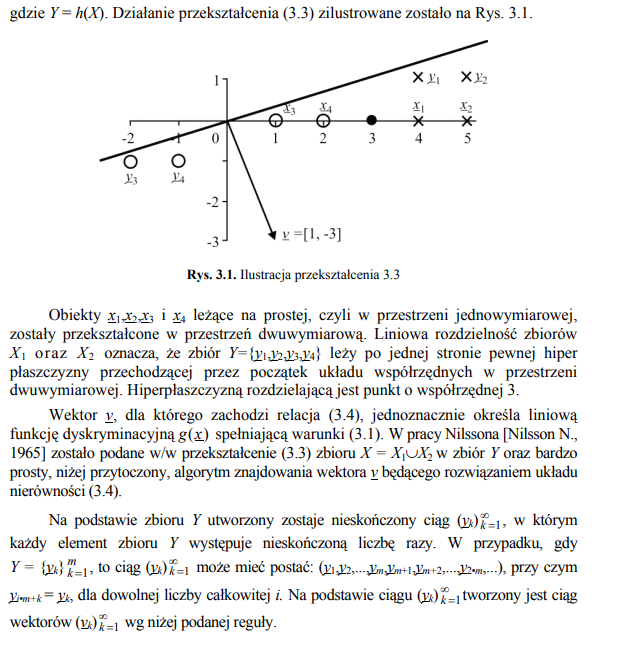

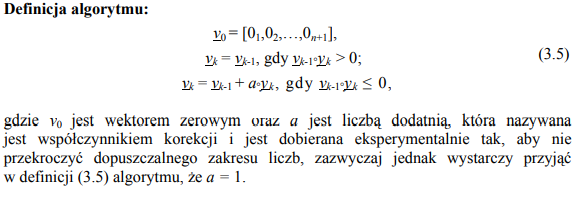

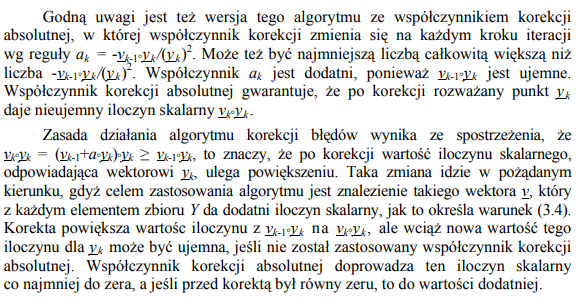

# Dane wejściowe

In [2]:
train_file_path = "../data/epj_trn.txt"
max_iter_count = 1000
classes = [2,3]

train_data = pd.read_csv(train_file_path,skiprows=1, index_col=False,skipinitialspace=True, delim_whitespace=True, header=None).to_numpy()

print(Counter(train_data[:,0]))

# remove row with class not consider in trainning 
train_data =  np.delete(train_data, 
                        np.where( (train_data[:, 0]!=classes[1]) & (train_data[:, 0] != classes[0]) ),
                        axis=0)
original_train_data = train_data.copy()

# Replace classes with 1 and -1
class_1_mask = train_data[:,0]==classes[1]

train_data[class_1_mask] *=-1
train_data[:,0][class_1_mask]=-1

train_data[:,0][train_data[:,0]==classes[0]]=1



#move first 
train_data = np.roll(train_data,-1,axis=1)


print(Counter(train_data[:,-1]))

Counter({1.0: 200, 2.0: 200, 3.0: 200})
Counter({1.0: 200, -1.0: 200})


In [3]:
train_data

array([[ 11.1183,   1.6625,   3.4437, ...,   3.3788,   0.    ,   1.    ],
       [ 11.2854,   1.7872,   3.0176, ...,   3.8034,   0.    ,   1.    ],
       [ 11.9664,   3.7841,   7.6029, ...,   3.5528,   0.0406,   1.    ],
       ...,
       [ -9.7505,  -0.46  ,  -0.8593, ...,  -3.9792,  -0.    ,  -1.    ],
       [ -9.9564,  -0.5058,  -1.1054, ...,  -3.5619,  -0.    ,  -1.    ],
       [-10.4927,  -0.4209,  -0.3162, ...,  -3.5619,  -0.    ,  -1.    ]])

In [4]:
markers = train_data[:,-1].copy().astype(str)
markers[train_data[:,-1]==1]='o'
markers[train_data[:,-1]==-1]="^"


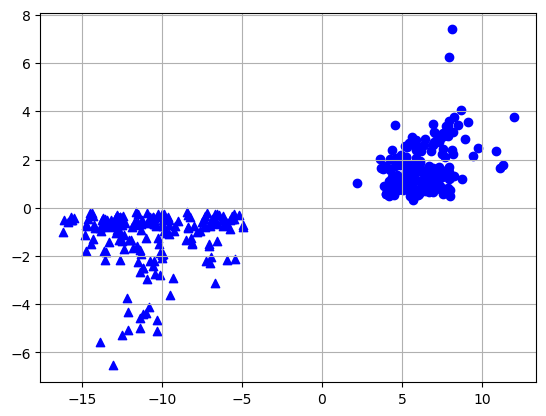

In [5]:
for x,y,z,marker in zip(train_data[:,0],train_data[:,1],train_data[:,2],markers):
    plt.scatter(x,y,c="blue",marker=marker)
plt.grid()

In [6]:
def discrimiantion_fucntion(data,current_v):
    return np.inner(data,current_v[:-1])+current_v[-1]

def classify(data, current_v):
    discrimiation_fucntion_value = discrimiantion_fucntion(data,current_v)
    if discrimiation_fucntion_value>0:
        return 1
    return -1

def error_count(data,current_v):
    expected_value = data[:,-1] # 1 -1
    actual_values = np.array([classify(data_row[:-1],current_v) for data_row in data])
    # print("expected_value,actual_values,correct?")
    # print( np.vstack([expected_value, actual_values,expected_value!=actual_values]).T)
    return np.sum(expected_value!=actual_values)

In [ ]:
v = np.zeros(train_data.shape[1])
best_v = np.zeros(train_data.shape[1])

best_error_count = np.Inf # the lower the better
no_train_count = 0
alpha = 10**(-3)
max_iter_count = 10**5
np.random.shuffle(train_data)

for index, train_row in tqdm(enumerate(cycle(train_data)),total=max_iter_count):
    if index>max_iter_count:
        break
    if no_train_count>len(train_data):
        break

    product = np.inner(train_row,v)
    if product<=0:
        v+=train_row
        no_train_count=0
    else:
        no_train_count +=1
    
    current_error_count = error_count(train_data, v)
    if current_error_count<=best_error_count:
        best_error_count = current_error_count
        best_v = v.copy()
    # print(f"Iteration {index:<4} | product = {np.round(product,2):<6} | current_error_count={current_error_count/len(train_data)}")

  0%|          | 0/100000 [00:00<?, ?it/s]

Iteration 0    | product = 0.0    | current_error_count=0.0
Iteration 1    | product = -131.75 | current_error_count=1.0
Iteration 2    | product = -27.17 | current_error_count=0.0
Iteration 3    | product = -63.85 | current_error_count=1.0
Iteration 4    | product = -64.47 | current_error_count=0.0025
Iteration 5    | product = 47.37  | current_error_count=0.0025
Iteration 6    | product = 32.37  | current_error_count=0.0025
Iteration 7    | product = 41.48  | current_error_count=0.0025
Iteration 8    | product = 61.07  | current_error_count=0.0025
Iteration 9    | product = -37.32 | current_error_count=1.0
Iteration 10   | product = 246.82 | current_error_count=1.0
Iteration 11   | product = -78.49 | current_error_count=0.7275
Iteration 12   | product = 37.5   | current_error_count=0.7275
Iteration 13   | product = -17.86 | current_error_count=0.015
Iteration 14   | product = -17.43 | current_error_count=1.0
Iteration 15   | product = 172.96 | current_error_count=1.0
Iteration 16   |

In [8]:
@np.vectorize
def discrimination_func(x,y):
    return (best_v[0]*x+best_v[1]*y+best_v[2])>0
x = np.linspace(np.min(train_data)*1.3, np.max(train_data)*1.3, 1000)
X,Y = np.meshgrid(x,x)
X = X.T
Y = Y.T
Z = discrimination_func(X, Y)
Z

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

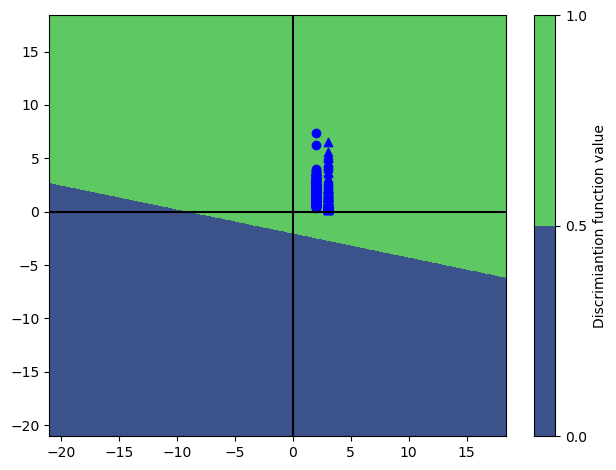

In [9]:
h= plt.contourf(X, Y, Z)


markers = original_train_data[:,0].copy().astype(str)
markers[original_train_data[:,0]==classes[0]]='o'
markers[original_train_data[:,0]==classes[1]]="^"

for x,y,z,marker in zip(original_train_data[:,0],original_train_data[:,1],original_train_data[:,2],markers):
    plt.scatter(x,z,c="blue",marker=marker)

plt.colorbar(h, label="Discrimiantion function value")
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.tight_layout()